In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading Datasets

In [3]:
!ls "datasets"

claims-2002-2006_0.xls                 claims-2014.xls
claims-2007-2009_0.xls                 claims-data-2015-as-of-feb-9-2016.xlsx
claims-2010-2013_0.xls


In [4]:
!head -n1 "datasets/claims-2002-2006_0.xls"

PK     ! 71���  �   [Content_Types].xml �(�                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 �TKo�0�O��r����4Q8�qܐ`? 4�F�I�~nxhC@��ҨI�=۽����%4�梛uD�p��Y.���H��ժrr����]o���	G[�EI�_�Ģ�Za�<X>��P+��0�^s5���<��YK)5��{��ZT���x{�db�H^7��\(�+S(b�ri�I�SS�vŢf�} �����|0�F@��Pȣ�*��t�*��(K�񁭟`hNN���}�s�!�@��f�rU�����y�KSS���؝�3��2ʸto,���[t����^B�i!DZW�7v�mc.U ="������n�Aj��q�>��[3����瑧F��_aעMt��7�b�3�ȹ��`A3�4�#�2���/   �� PK     ! �U0#�   L   _rels/.rels �(�                     

In [7]:
df1 = pd.read_excel('datasets/claims-2002-2006_0.xls')
df1.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,2002-01-04 00:00:00,2002-12-12 00:00:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full
1,0202417M,2002-02-02 00:00:00,2004-01-16 00:00:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settled,50.00,Settle
2,0202445M,2002-02-04 00:00:00,2003-11-26 00:00:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle
3,0909816M,2002-02-07 00:00:00,2003-01-06 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full
4,2005032379513,2002-02-18 00:00:00,2005-02-05 00:00:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,"Baby - Strollers, car seats, playpen, etc.",84.79,Approved,84.79,Approve in Full


In [5]:
# UDF for adding underscore between column_names of two words or more
def addUnderscore(current_columns):
    new_columns = []
    for item in current_columns:
        segments = item.split()
        new_columns.append('_'.join(segments))
    return new_columns

In [6]:
df1.columns

Index([u'Claim Number', u'Date Received', u'Incident Date', u'Airport Code',
       u'Airport Name', u'Airline Name', u'Claim Type', u'Claim Site', u'Item',
       u'Claim Amount', u'Status', u'Close Amount', u'Disposition'],
      dtype='object')

In [7]:
new_columns = []
for item in df1.columns.tolist():
    segments = item.split()
    new_columns.append('_'.join(segments))

In [8]:
new_columns

[u'Claim_Number',
 u'Date_Received',
 u'Incident_Date',
 u'Airport_Code',
 u'Airport_Name',
 u'Airline_Name',
 u'Claim_Type',
 u'Claim_Site',
 u'Item',
 u'Claim_Amount',
 u'Status',
 u'Close_Amount',
 u'Disposition']

In [9]:
df1.rename(columns=dict(zip(df1.columns, addUnderscore(df1.columns.tolist()))), inplace=True)
df1.head()

,Claim_Number,Date_Received,Incident_Date,Airport_Code,Airport_Name,Airline_Name,Claim_Type,Claim_Site,Item,Claim_Amount,Status,Close_Amount,Disposition
0,0909802M,2002-01-04 00:00:00,2002-12-12 00:00:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full
1,0202417M,2002-02-02 00:00:00,2004-01-16 00:00:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settled,50.00,Settle
2,0202445M,2002-02-04 00:00:00,2003-11-26 00:00:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle
3,0909816M,2002-02-07 00:00:00,2003-01-06 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full
4,2005032379513,2002-02-18 00:00:00,2005-02-05 00:00:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,"Baby - Strollers, car seats, playpen, etc.",84.79,Approved,84.79,Approve in Full


In [10]:
df1.index

RangeIndex(start=0, stop=97231, step=1)

In [11]:
df2 = pd.read_excel('datasets/claims-2007-2009_0.xls')
df2.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,2007010518383,2007-01-01,2006-11-25 00:00:00,PHX,Phoenix Sky Harbor International,Southwest Airlines,Passenger Property Loss,Checked Baggage,Automobile Parts; Other,319.73,Denied,0.0,Deny
1,2007020620282,2007-01-02,2007-01-02 00:00:00,RDU,Raleigh-Durham International,Delta Air Lines,Passenger Property Loss,Checkpoint,Watches - Expensive more than $100,1995.00,Denied,0.0,Deny
2,2007020620284,2007-01-02,2006-12-05 00:00:00,BOS,Boston (Logan) International Airport,Jet Blue,Passenger Property Loss,Checked Baggage,Computer - Laptop,850.00,Denied,0.0,Deny
3,2008010937576,2007-01-02,2007-12-04 00:00:00,SJC,Norman Y Mineta San Jose International,Continental Airlines,Passenger Property Loss,Checked Baggage,Eyeglasses - (including contact lenses),350.00,Denied,0.0,Deny
4,2008010437392,2007-01-02,2007-12-22 00:00:00,LAS,McCarran International,Alaska Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),NaN,"Insufficient, one of the following items requi...",NaN,NaN


In [12]:
df2.columns.tolist()

[u'Claim Number',
 u'Date Received',
 u'Incident Date',
 u'Airport Code',
 u'Airport Name',
 u'Airline Name',
 u'Claim Type',
 u'Claim Site',
 u'Item',
 u'Claim Amount',
 u'Status',
 u'Close Amount',
 u'Disposition']

In [13]:
df2.rename(columns=dict(zip(df2.columns.tolist(),addUnderscore(df2.columns.tolist()))), inplace=True)
df2.head()

,Claim_Number,Date_Received,Incident_Date,Airport_Code,Airport_Name,Airline_Name,Claim_Type,Claim_Site,Item,Claim_Amount,Status,Close_Amount,Disposition
0,2007010518383,2007-01-01,2006-11-25 00:00:00,PHX,Phoenix Sky Harbor International,Southwest Airlines,Passenger Property Loss,Checked Baggage,Automobile Parts; Other,319.73,Denied,0.0,Deny
1,2007020620282,2007-01-02,2007-01-02 00:00:00,RDU,Raleigh-Durham International,Delta Air Lines,Passenger Property Loss,Checkpoint,Watches - Expensive more than $100,1995.00,Denied,0.0,Deny
2,2007020620284,2007-01-02,2006-12-05 00:00:00,BOS,Boston (Logan) International Airport,Jet Blue,Passenger Property Loss,Checked Baggage,Computer - Laptop,850.00,Denied,0.0,Deny
3,2008010937576,2007-01-02,2007-12-04 00:00:00,SJC,Norman Y Mineta San Jose International,Continental Airlines,Passenger Property Loss,Checked Baggage,Eyeglasses - (including contact lenses),350.00,Denied,0.0,Deny
4,2008010437392,2007-01-02,2007-12-22 00:00:00,LAS,McCarran International,Alaska Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),NaN,"Insufficient, one of the following items requi...",NaN,NaN


In [14]:
df2.index

RangeIndex(start=0, stop=47912, step=1)

In [15]:
df2.columns

Index([u'Claim_Number', u'Date_Received', u'Incident_Date', u'Airport_Code',
       u'Airport_Name', u'Airline_Name', u'Claim_Type', u'Claim_Site', u'Item',
       u'Claim_Amount', u'Status', u'Close_Amount', u'Disposition'],
      dtype='object')

In [18]:
df2.columns.difference(df1.columns)

Index([], dtype='object')

In [19]:
!ls "datasets"

claims-2002-2006_0.xls                 claims-2014.xls
claims-2007-2009_0.xls                 claims-data-2015-as-of-feb-9-2016.xlsx
claims-2010-2013_0.xls


In [20]:
df3 = pd.read_excel('datasets/claims-2010-2013_0.xls')
df3.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item Category,Close Amount,Disposition
0,2010010567154,2010-01-04,2010-01-03 14:30:00,SLC,Salt Lake City International Airport,Delta Air Lines,Property Damage,Checked Baggage,Cosmetics & Grooming,0,Deny
1,2010010567158,2010-01-04,2010-01-02 00:00:00,LAX,Los Angeles International Airport,Southwest Airlines,Passenger Property Loss,Checked Baggage,Other,0,Deny
2,2010010567173,2010-01-04,2010-01-02 05:00:00,SEA,Seattle-Tacoma International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras; Cameras,0,Deny
3,2010010567177,2010-01-04,2010-01-01 00:00:00,DEN,Denver International Airport,Southwest Airlines,Passenger Property Loss,Checked Baggage,Clothing,-,-
4,2010010567182,2010-01-04,2010-01-02 00:00:00,LAS,McCarran International,American Airlines,Passenger Property Loss,Checked Baggage,Travel Accessories,0,Deny


In [21]:
df3.columns

Index([u'Claim Number', u'Date Received', u'Incident Date', u'Airport Code',
       u'Airport Name', u'Airline Name', u'Claim Type', u'Claim Site',
       u'Item Category', u'Close Amount', u'Disposition'],
      dtype='object')

In [22]:
addUnderscore(df3.columns)

[u'Claim_Number',
 u'Date_Received',
 u'Incident_Date',
 u'Airport_Code',
 u'Airport_Name',
 u'Airline_Name',
 u'Claim_Type',
 u'Claim_Site',
 u'Item_Category',
 u'Close_Amount',
 u'Disposition']

In [23]:
df3.rename(columns=dict(zip(df3.columns.tolist(),addUnderscore(df3.columns.tolist()))), inplace=True)
df3.head()

,Claim_Number,Date_Received,Incident_Date,Airport_Code,Airport_Name,Airline_Name,Claim_Type,Claim_Site,Item_Category,Close_Amount,Disposition
0,2010010567154,2010-01-04,2010-01-03 14:30:00,SLC,Salt Lake City International Airport,Delta Air Lines,Property Damage,Checked Baggage,Cosmetics & Grooming,0,Deny
1,2010010567158,2010-01-04,2010-01-02 00:00:00,LAX,Los Angeles International Airport,Southwest Airlines,Passenger Property Loss,Checked Baggage,Other,0,Deny
2,2010010567173,2010-01-04,2010-01-02 05:00:00,SEA,Seattle-Tacoma International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras; Cameras,0,Deny
3,2010010567177,2010-01-04,2010-01-01 00:00:00,DEN,Denver International Airport,Southwest Airlines,Passenger Property Loss,Checked Baggage,Clothing,-,-
4,2010010567182,2010-01-04,2010-01-02 00:00:00,LAS,McCarran International,American Airlines,Passenger Property Loss,Checked Baggage,Travel Accessories,0,Deny


In [24]:
df3.columns.difference(df1.columns)

Index([u'Item_Category'], dtype='object')

In [25]:
!ls 'datasets'

claims-2002-2006_0.xls                 claims-2014.xls
claims-2007-2009_0.xls                 claims-data-2015-as-of-feb-9-2016.xlsx
claims-2010-2013_0.xls


In [26]:
df4 = pd.read_excel('datasets/claims-2014.xls')
df4.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item Category,Close Amount,Disposition
0,2013081805991,2014-01-13,2012-12-21 00:00:00,HPN,"Westchester County, White Plains",USAir,Personal Injury,Checked Baggage,Audio/Video; Jewelry & Watches,0,Deny
1,2014080215586,2014-07-17,2014-06-30 18:38:00,MCO,Orlando International Airport,Delta Air Lines,Property Damage,Checked Baggage,-,0,Deny
2,2014010710583,2014-01-07,2013-12-27 22:00:00,SJU,Luis Munoz Marin International,Jet Blue,Property Damage,Checked Baggage,Food & Drink,50,Approve in Full
3,2014010910683,2014-01-07,2014-01-02 00:00:00,IAD,Washington Dulles International,UAL,Property Damage,Checked Baggage,Baggage/Cases/Purses,0,Deny
4,2014011310783,2014-01-09,2014-01-07 00:00:00,SAT,San Antonio International,Southwest Airlines,Property Damage,Checked Baggage,Computer & Accessories,0,Deny


In [27]:
df4.rename(columns=dict(zip(df4.columns.tolist(), addUnderscore(df4.columns.tolist()))), inplace=True)
df4.head()

,Claim_Number,Date_Received,Incident_Date,Airport_Code,Airport_Name,Airline_Name,Claim_Type,Claim_Site,Item_Category,Close_Amount,Disposition
0,2013081805991,2014-01-13,2012-12-21 00:00:00,HPN,"Westchester County, White Plains",USAir,Personal Injury,Checked Baggage,Audio/Video; Jewelry & Watches,0,Deny
1,2014080215586,2014-07-17,2014-06-30 18:38:00,MCO,Orlando International Airport,Delta Air Lines,Property Damage,Checked Baggage,-,0,Deny
2,2014010710583,2014-01-07,2013-12-27 22:00:00,SJU,Luis Munoz Marin International,Jet Blue,Property Damage,Checked Baggage,Food & Drink,50,Approve in Full
3,2014010910683,2014-01-07,2014-01-02 00:00:00,IAD,Washington Dulles International,UAL,Property Damage,Checked Baggage,Baggage/Cases/Purses,0,Deny
4,2014011310783,2014-01-09,2014-01-07 00:00:00,SAT,San Antonio International,Southwest Airlines,Property Damage,Checked Baggage,Computer & Accessories,0,Deny


In [34]:
print(df1.columns.difference(df4.columns))
print(df4.columns.difference(df3.columns))

Index([u'Claim_Amount', u'Item', u'Status'], dtype='object')
Index([], dtype='object')


In [29]:
!ls 'datasets'

claims-2002-2006_0.xls                 claims-2014.xls
claims-2007-2009_0.xls                 claims-data-2015-as-of-feb-9-2016.xlsx
claims-2010-2013_0.xls


In [30]:
df5 = pd.read_excel('datasets/claims-data-2015-as-of-feb-9-2016.xlsx')
df5.head()

,Claim Number,Date Received,Incident D,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item Category,Close Amount,Disposition
0,2015060222904,2015-05-28,2015-05-21,ABE,"Lehigh Valley International Airport, Allentown",Allegiant Air,Property Damage,Checkpoint,Personal Electronics,0,Deny
1,2015082725115,2015-08-21,2015-08-01,ABE,"Lehigh Valley International Airport, Allentown",-,Property Damage,Checked Baggage,Sporting Equipment & Supplies,180,Settle
2,2015102326219,2015-10-07,2015-10-02,ABE,"Lehigh Valley International Airport, Allentown",Allegiant Air,Passenger Property Loss,Checked Baggage,Clothing,60,Approve in Full
3,2015122027695,2015-10-27,2015-10-19,ABE,"Lehigh Valley International Airport, Allentown",Allegiant Air,Property Damage,Checkpoint,Personal Accessories,-,-
4,2015012220065,2015-01-22,2014-12-23,ABI,Abilene Regional,American Airlines,Property Damage,Checked Baggage,Home Decor,0,Deny


In [31]:
df5.rename(columns=dict(zip(df5.columns.tolist(), addUnderscore(df5.columns.tolist()))),inplace=True)
df5.head()

,Claim_Number,Date_Received,Incident_D,Airport_Code,Airport_Name,Airline_Name,Claim_Type,Claim_Site,Item_Category,Close_Amount,Disposition
0,2015060222904,2015-05-28,2015-05-21,ABE,"Lehigh Valley International Airport, Allentown",Allegiant Air,Property Damage,Checkpoint,Personal Electronics,0,Deny
1,2015082725115,2015-08-21,2015-08-01,ABE,"Lehigh Valley International Airport, Allentown",-,Property Damage,Checked Baggage,Sporting Equipment & Supplies,180,Settle
2,2015102326219,2015-10-07,2015-10-02,ABE,"Lehigh Valley International Airport, Allentown",Allegiant Air,Passenger Property Loss,Checked Baggage,Clothing,60,Approve in Full
3,2015122027695,2015-10-27,2015-10-19,ABE,"Lehigh Valley International Airport, Allentown",Allegiant Air,Property Damage,Checkpoint,Personal Accessories,-,-
4,2015012220065,2015-01-22,2014-12-23,ABI,Abilene Regional,American Airlines,Property Damage,Checked Baggage,Home Decor,0,Deny


In [30]:
df1.columns.difference(df5.columns)

Index([u'Claim_Amount', u'Incident_Date', u'Item', u'Status'], dtype='object')

In [31]:
df1.columns.difference(df2.columns)

Index([], dtype='object')

In [32]:
df1.columns.difference(df3.columns)

Index([u'Claim_Amount', u'Item', u'Status'], dtype='object')

In [33]:
df3.columns.difference(df4.columns)

Index([], dtype='object')

In [34]:
df4.columns.difference(df5.columns)

Index([u'Incident_Date'], dtype='object')

In [35]:
df1.head()

,Claim_Number,Date_Received,Incident_Date,Airport_Code,Airport_Name,Airline_Name,Claim_Type,Claim_Site,Item,Claim_Amount,Status,Close_Amount,Disposition
0,0909802M,2002-01-04 00:00:00,2002-12-12 00:00:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full
1,0202417M,2002-02-02 00:00:00,2004-01-16 00:00:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settled,50.00,Settle
2,0202445M,2002-02-04 00:00:00,2003-11-26 00:00:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle
3,0909816M,2002-02-07 00:00:00,2003-01-06 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full
4,2005032379513,2002-02-18 00:00:00,2005-02-05 00:00:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,"Baby - Strollers, car seats, playpen, etc.",84.79,Approved,84.79,Approve in Full


In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97231 entries, 0 to 97230
Data columns (total 13 columns):
Claim_Number     97231 non-null object
Date_Received    96973 non-null object
Incident_Date    95150 non-null object
Airport_Code     89207 non-null object
Airport_Name     89207 non-null object
Airline_Name     66496 non-null object
Claim_Type       89593 non-null object
Claim_Site       96688 non-null object
Item             95558 non-null object
Claim_Amount     93945 non-null float64
Status           97231 non-null object
Close_Amount     89373 non-null float64
Disposition      87097 non-null object
dtypes: float64(2), object(11)
memory usage: 9.6+ MB


In [37]:
df1.isnull().sum()

Claim_Number         0
Date_Received      258
Incident_Date     2081
Airport_Code      8024
Airport_Name      8024
Airline_Name     30735
Claim_Type        7638
Claim_Site         543
Item              1673
Claim_Amount      3286
Status               0
Close_Amount      7858
Disposition      10134
dtype: int64

In [38]:
df1.describe()

,Claim_Amount,Close_Amount
count,9.394500e+04,89373.000000
mean,1.646253e+05,119.321227
std,2.579837e+07,1115.063636
min,0.000000e+00,0.000000
25%,6.000000e+01,0.000000
50%,1.580000e+02,25.000000
75%,4.159800e+02,99.990000
max,5.000000e+09,250000.000000


In [39]:
df1.describe(include=[object])

,Claim_Number,Date_Received,Incident_Date,Airport_Code,Airport_Name,Airline_Name,Claim_Type,Claim_Site,Item,Status,Disposition
count,97231,96973,95150,89207,89207,66496,89593,96688,95558,97231,87097
unique,97230,1280,1867,387,387,155,6,4,1219,9,3
top,2004050450432,2003-12-05 00:00:00,2004-12-27 00:00:00,LAX,Los Angeles International Airport,American Airlines,Passenger Property Loss,Checked Baggage,Other,Denied,Deny
freq,2,682,144,4894,4894,10196,50168,76703,26027,35480,35502


In [40]:
df1.Item.value_counts().head(20)

Other                                                           26027
Luggage (all types including footlockers)                       15088
Clothing - Shoes, belts, accessories, etc.                      11469
Jewelry - Fine                                                   7911
Cameras - Digital                                                6975
Locks                                                            6468
Computer - Laptop                                                5121
Eyeglasses - (including contact lenses)                          2782
Cosmetics - Perfume, toilet articles, medicines, soaps, etc.     2026
Currency                                                         1738
Cell Phones                                                      1421
DVD/CD Players                                                   1040
Medicines                                                         627
Stereo Items & Accessories                                        573
PDA - Personal Data 

In [41]:
df2.Item.value_counts().head(15)

Other                                                           4435
Luggage (all types including footlockers)                       4040
Clothing - Shoes, belts, accessories, etc.                      3468
Computer - Laptop                                               3457
Locks                                                           3102
Cameras - Digital                                               2196
Jewelry - Fine                                                  1991
Cosmetics - Perfume, toilet articles, medicines, soaps, etc.    1464
Eyeglasses - (including contact lenses)                         1185
Cell Phones                                                      737
Jewelry - Costume                                                714
Currency                                                         695
MP3 Players-(iPods, etc)                                         638
Sporting Equipment & Supplies (footballs, parachutes, etc.)      604
Watches - Expensive more than $100

In [42]:
df3.Item_Category.value_counts().head(20)

Other                                       5032
Baggage/Cases/Purses                        4246
Computer & Accessories                      3708
Clothing                                    3194
Jewelry & Watches                           3026
-                                           2844
Travel Accessories                          2761
Personal Electronics                        2228
Personal Accessories                        1456
Cosmetics & Grooming                        1383
Cameras                                     1148
Sporting Equipment & Supplies                914
Currency                                     669
Medical/Science                              591
Food & Drink                                 589
Home Decor                                   383
Household Items                              342
Hunting & Fishing Items                      332
Baggage/Cases/Purses; Travel Accessories     320
Tools & Home Improvement Supplies            253
Name: Item_Category,

In [43]:
df4.Item_Category.value_counts().head(20)

Baggage/Cases/Purses                 1102
-                                     916
Other                                 844
Clothing                              793
Computer & Accessories                705
Jewelry & Watches                     604
Personal Electronics                  601
Travel Accessories                    473
Cosmetics & Grooming                  332
Personal Accessories                  331
Sporting Equipment & Supplies         269
Cameras                               165
Food & Drink                          160
Medical/Science                       148
Currency                              142
Home Decor                            139
Hunting & Fishing Items                97
Household Items                        93
Tools & Home Improvement Supplies      52
Audio/Video                            47
Name: Item_Category, dtype: int64

In [46]:
df5.Item_Category.value_counts().head(20)

Baggage/Cases/Purses                 1004
Computer & Accessories                736
Clothing                              723
-                                     663
Other                                 570
Personal Electronics                  561
Jewelry & Watches                     509
Travel Accessories                    454
Personal Accessories                  347
Cosmetics & Grooming                  310
Sporting Equipment & Supplies         200
Home Decor                            168
Food & Drink                          168
Medical/Science                       148
Currency                              137
Cameras                               127
Household Items                       111
Audio/Video                           103
Hunting & Fishing Items               103
Tools & Home Improvement Supplies      61
Name: Item_Category, dtype: int64

In [45]:
df1_cats = pd.DataFrame(data={'df1_categories':df1.Item.value_counts().index, 'df1_count':df1.Item.value_counts().values})
df2_cats = pd.DataFrame(data={'df2_categories':df2.Item.value_counts().index, 'df2_count':df2.Item.value_counts().values})
df3_cats = pd.DataFrame(data={'df3_categories':df3.Item_Category.value_counts().index, 'df3_count':df3.Item_Category.value_counts().values})
df4_cats = pd.DataFrame(data={'df4_categories':df4.Item_Category.value_counts().index, 'df4_count':df4.Item_Category.value_counts().values})
df5_cats = pd.DataFrame(data={'df5_categories':df5.Item_Category.value_counts().index, 'df5_count':df5.Item_Category.value_counts().values})
category_counts = pd.concat([df1_cats,df2_cats,df3_cats,df4_cats,df5_cats],axis=1)
category_counts.head()

,df1_categories,df1_count,df2_categories,df2_count,df3_categories,df3_count,df4_categories,df4_count,df5_categories,df5_count
0,Other,26027.0,Other,4435,Other,5032.0,Baggage/Cases/Purses,1102.0,Baggage/Cases/Purses,1004.0
1,Luggage (all types including footlockers),15088.0,Luggage (all types including footlockers),4040,Baggage/Cases/Purses,4246.0,-,916.0,Computer & Accessories,736.0
2,"Clothing - Shoes, belts, accessories, etc.",11469.0,"Clothing - Shoes, belts, accessories, etc.",3468,Computer & Accessories,3708.0,Other,844.0,Clothing,723.0
3,Jewelry - Fine,7911.0,Computer - Laptop,3457,Clothing,3194.0,Clothing,793.0,-,663.0
4,Cameras - Digital,6975.0,Locks,3102,Jewelry & Watches,3026.0,Computer & Accessories,705.0,Other,570.0


In [46]:
list(set(df1.Item.value_counts().head(20).index)-set(df2.Item.value_counts().head(20).index))

[u'DVD/CD Players',
 u'Medicines',
 u'Stereo Items & Accessories',
 u'Baby - Strollers, car seats, playpen, etc.',
 u'Musical Instruments - Other - Over $250',
 u'Photographic Film',
 u'PDA - Personal Data Assistants',
 u'Fish/Game']

# Target Analysis

In [47]:
df1.Disposition.value_counts(dropna=False)

Deny               35502
Approve in Full    28438
Settle             23157
NaN                10134
Name: Disposition, dtype: int64

In [48]:
df1.Disposition.value_counts(dropna=False)/len(df1)

Deny               0.365130
Approve in Full    0.292479
Settle             0.238165
NaN                0.104226
Name: Disposition, dtype: float64

In [49]:
df1.groupby('Disposition')['Claim_Amount'].describe()

Disposition           
Approve in Full  count    2.822500e+04
                 mean     1.439967e+02
                 std      3.385402e+02
                 min      0.000000e+00
                 25%      2.800000e+01
                 50%      6.000000e+01
                 75%      1.408700e+02
                 max      1.306000e+04
Deny             count    3.517000e+04
                 mean     2.945767e+05
                 std      3.266434e+07
                 min      0.000000e+00
                 25%      1.000000e+02
                 50%      2.720000e+02
                 75%      7.500000e+02
                 max      5.000000e+09
Settle           count    2.294300e+04
                 mean     6.808751e+02
                 std      1.426614e+04
                 min      0.000000e+00
                 25%      1.009800e+02
                 50%      2.100000e+02
                 75%      4.449400e+02
                 max      2.000000e+06
Name: Claim_Amount, dtype: float64

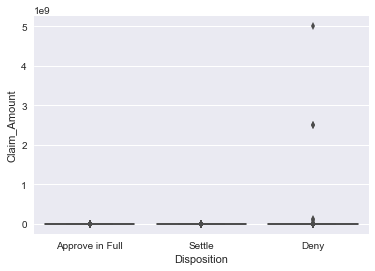

In [50]:
sns.boxplot(x='Disposition',y='Claim_Amount',data=df1)

In [51]:
df1[np.abs(df1.Claim_Amount-df1.Claim_Amount.mean()) > 3*df1.Claim_Amount.std()]

,Claim_Number,Date_Received,Incident_Date,Airport_Code,Airport_Name,Airline_Name,Claim_Type,Claim_Site,Item,Claim_Amount,Status,Close_Amount,Disposition
35811,2004052653605,2004-05-26 00:00:00,2002-09-05 00:00:00,NaN,NaN,NaN,Personal Injury,Other,NaN,5.000000e+09,Canceled,0.0,NaN
49122,2004110866757,2004-11-04 00:00:00,NaN,C,"Civil Aviation, Non TSA manned Airport",Civil Aviation - Non-Commercial Carrier,Passenger Property Loss,Other,Other,2.500000e+09,Denied,0.0,Deny
50567,2004121669173,2004-11-23 00:00:00,2004-05-23 00:00:00,NaN,NaN,NaN,Passenger Property Loss,Other,Other,2.500000e+09,Denied,0.0,Deny
69190,2005080990257,2005-08-01 00:00:00,2005-06-13 00:00:00,PHX,Phoenix Sky Harbor International,Sun Country Airlines Inc,Personal Injury,Checkpoint,Medicines,1.250000e+08,Denied,0.0,Deny
82901,2006032803795,2006-03-27 00:00:00,2004-06-01 00:00:00,PHX,Phoenix Sky Harbor International,NaN,Personal Injury,Other,NaN,5.000000e+09,In litigation,NaN,Deny
86400,2006060907675,2006-06-06 00:00:00,2006-04-19 00:00:00,LAX,Los Angeles International Airport,America West,Personal Injury,Checked Baggage,Currency; Locks; Other,1.000000e+08,Denied,0.0,Deny


In [52]:
df1=df1[np.abs(df1.Claim_Amount-df1.Claim_Amount.mean())<=3*df1.Claim_Amount.std()]

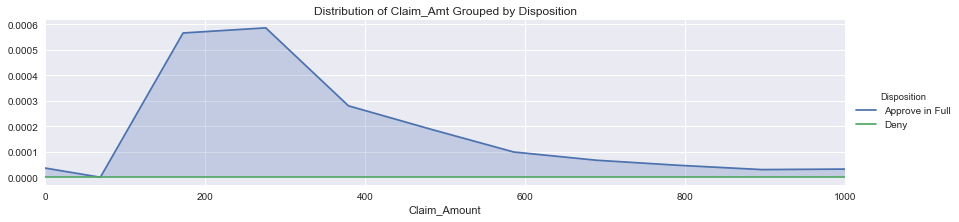

In [73]:
fig = sns.FacetGrid(df1[~df1.Disposition.isin(['Settle'])], hue='Disposition', aspect=4)
fig.map(sns.kdeplot, 'Claim_Amount', shade=True)
#oldest = df1['Claim_Amount'].max()
fig.set(xlim=(0,1000))
fig.set(title='Distribution of Claim_Amt Grouped by Disposition')
fig.add_legend()

Disposition
Approve in Full    Axes(0.125,0.125;0.775x0.755)
Deny               Axes(0.125,0.125;0.775x0.755)
Settle             Axes(0.125,0.125;0.775x0.755)
Name: Claim_Amount, dtype: object

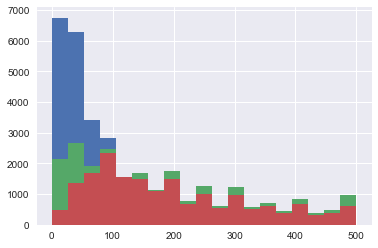

In [54]:
df1.groupby('Disposition')['Claim_Amount'].hist(bins=np.linspace(0,500,20))

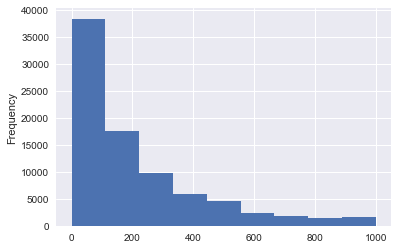

In [55]:
df1.Claim_Amount.plot.hist(by=df1.Disposition, bins=np.linspace(0,1000,10))

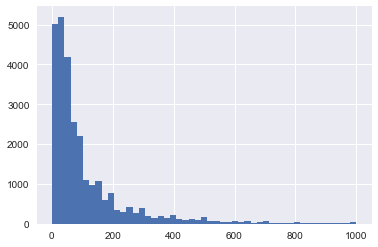

In [56]:
df1[df1.Disposition=='Approve in Full'].Claim_Amount.hist(bins=np.linspace(0,1000,50))

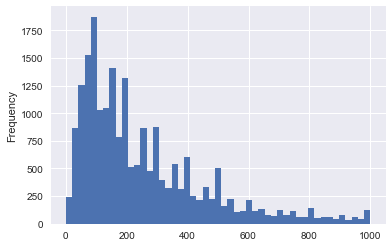

In [57]:
df1[df1.Disposition=='Settle'].Claim_Amount.plot.hist(bins=np.linspace(0,1000,50))

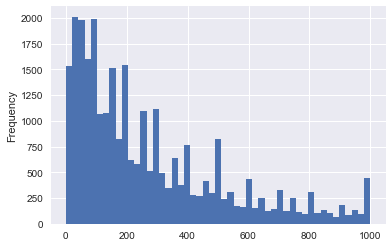

In [58]:
df1[df1.Disposition=='Deny'].Claim_Amount.plot.hist(bins=np.linspace(0,1000,50))

(0, 200000)

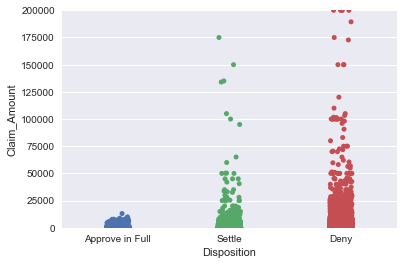

In [59]:
fig = sns.stripplot(x='Disposition',y='Claim_Amount',data=df1, jitter=True)
fig.set_ylim(0,200000)

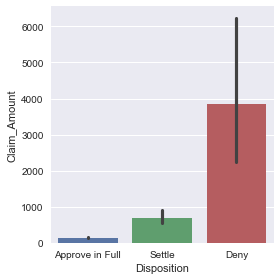

In [60]:
sns.factorplot(x='Disposition',y='Claim_Amount',data=df1, kind='bar')
#fig.set_ylim(0,200000)

In [61]:
df1[(df1.Disposition.notnull()) & (df1.Claim_Amount == 0)]#.Disposition.value_counts()

,Claim_Number,Date_Received,Incident_Date,Airport_Code,Airport_Name,Airline_Name,Claim_Type,Claim_Site,Item,Claim_Amount,Status,Close_Amount,Disposition
2603,0702509M,2003-02-13 00:00:00,2002-12-31 00:00:00,MCO,Orlando International Airport,UAL,Property Damage,Checked Baggage,Locks,0.0,Denied,0.00,Deny
10289,0708149M,2003-07-08 00:00:00,2003-06-13 00:00:00,OAK,Metropolitan Oakland International,UAL,Passenger Property Loss,Checked Baggage,Jewelry - Fine,0.0,Denied,0.00,Deny
10933,0715177M,2003-07-15 00:00:00,2003-07-01 00:00:00,SEA,Seattle-Tacoma International,NaN,Passenger Property Loss,Checkpoint,Other,0.0,Denied,0.00,Deny
16885,0929001M,2003-09-29 00:00:00,2003-08-30 00:00:00,SAN,San Diego International,UAL,Passenger Property Loss,Checked Baggage,Other,0.0,Denied,0.00,Deny
17088,1002092M,2003-10-02 00:00:00,2003-09-24 00:00:00,MCO,Orlando International Airport,NaN,NaN,Checkpoint,Cell Phones,0.0,Denied,0.00,Deny
18740,1022232M,2003-10-22 00:00:00,2003-09-23 00:00:00,HOU,William P. Hobby,Continental Airlines,Property Damage,Checked Baggage,Computer - Laptop,0.0,Denied,0.00,Deny
21347,1204011M,2003-12-04 00:00:00,2003-10-08 00:00:00,PHL,Philadelphia International Airport,British Airways,NaN,Checked Baggage,Other,0.0,Denied,0.00,Deny
22896,1217613M,2003-12-17 00:00:00,2003-11-15 00:00:00,CLE,Cleveland Hopkins International,American Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,0.0,Denied,0.00,Deny
25343,0115228M,2004-01-15 00:00:00,2003-10-13 00:00:00,JFK,John F. Kennedy International,Virgin Atlantic,Passenger Property Loss,Checkpoint,Other,0.0,Denied,0.00,Deny
29820,2004051050796,2004-03-10 00:00:00,2004-01-07 00:00:00,STL,Lambert St. Louis International,American Airlines,Passenger Property Loss,Checkpoint,Jewelry - Fine,0.0,Denied,0.00,Deny


In [62]:
df1.Status.value_counts()

Denied                                                                                                                           35152
Approved                                                                                                                         28218
Settled                                                                                                                          22939
Canceled                                                                                                                          4322
Insufficient, one of the following items required: sum certain, statement of fact, signature, location of incident, and date.     2303
Closed as a contractor claim                                                                                                       927
In litigation                                                                                                                       72
In review                                              

## Claim Type to Disposition

Passenger Property Loss    49177
Property Damage            37398
Passenger Theft              439
Personal Injury              429
Employee Loss (MPCECA)       413
Motor Vehicle                 62
Name: Claim_Type, dtype: int64


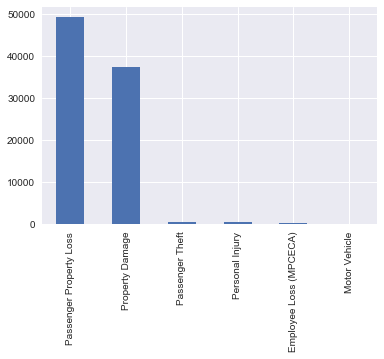

In [63]:
print(df1.Claim_Type.value_counts())
df1.Claim_Type.value_counts().plot(kind='bar')

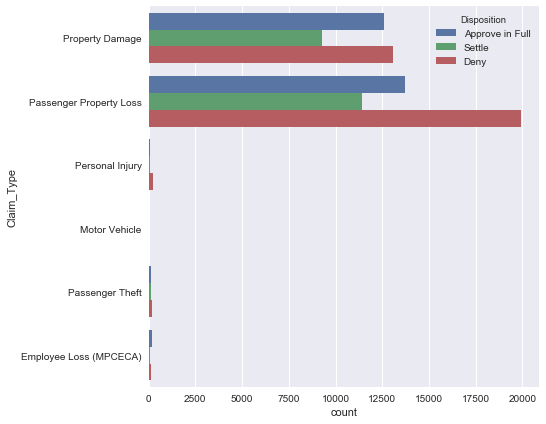

In [64]:
plt.figure(figsize=(7,7))
sns.countplot(y='Claim_Type',hue='Disposition',data=df1)

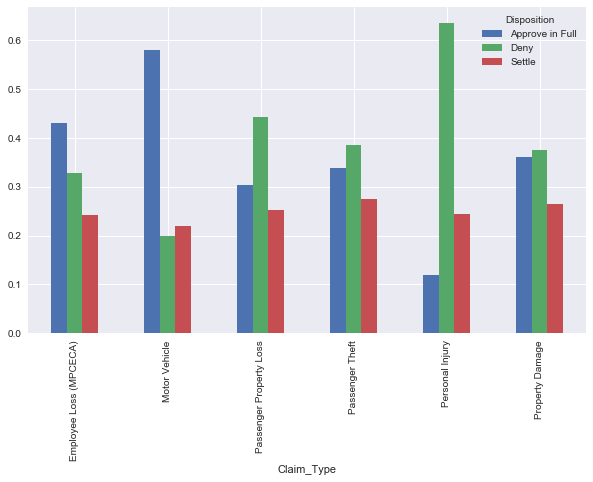

In [65]:
df1.groupby('Claim_Type')['Disposition'].agg('value_counts','count').unstack().plot(kind='bar',\
                                                                                   figsize=(10,6))

## Airport Code to Dispostion

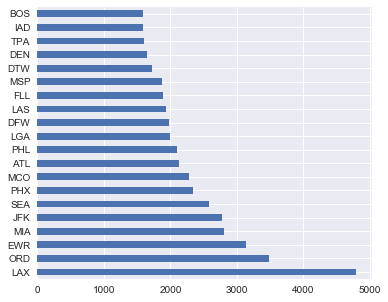

In [66]:
df1.Airport_Code.value_counts().head(20).plot(kind='barh', figsize=(6,5))

[u'LAX', u'ORD', u'EWR', u'MIA', u'JFK', u'SEA', u'PHX', u'MCO', u'ATL', u'PHL', u'LGA', u'DFW', u'LAS', u'FLL', u'MSP', u'DTW', u'DEN', u'TPA', u'IAD', u'BOS']


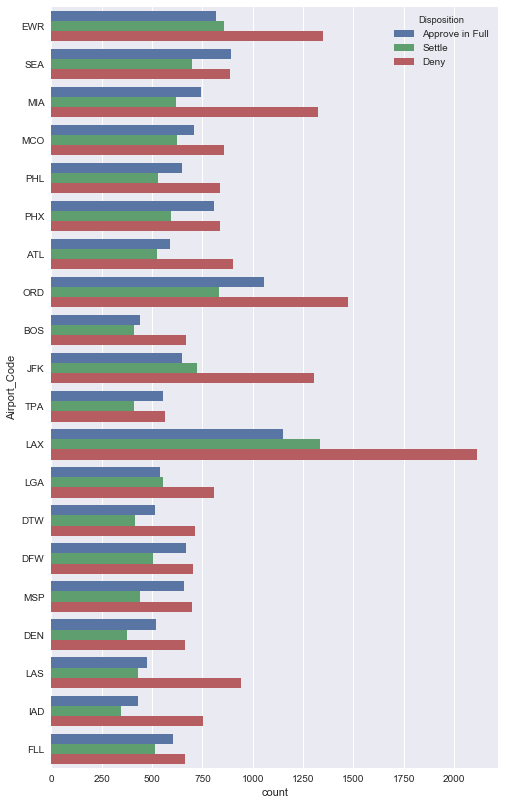

In [67]:
top20_airports = df1.Airport_Code.value_counts().head(20).index.tolist()
print top20_airports
plt.figure(figsize=(8,14))
sns.countplot(y='Airport_Code',hue='Disposition',data=df1[df1.Airport_Code.isin(top20_airports)])

In [ ]:
df1[df1.Airport_Code.isin(top20_airports)].groupby('Airport_Code')['Disposition']\
                                        .agg('value_counts','count')\
                                        .unstack()\
                                        .sort_values(by='Deny')\
                                        .plot(kind='barh', figsize=(8,14))

In [ ]:
# df1[df1.Airport_Code.isin(top20_airports)].groupby('Airport_Code')['Disposition']\
#                                         .agg('value_counts','count')\
#                                         .unstack()\
#                                         .plot(kind='barh',figsize=(8,14))

In [ ]:
print(df1.Claim_Site.value_counts())
df1.Claim_Site.value_counts().plot(kind='bar')

In [ ]:
fig, ax = plt.subplots()

ax.set_color_cycle(['green', 'blue', 'red'])

df1.groupby('Claim_Site')['Disposition'].agg('value_counts','count').unstack()\
                                        .sort_values('Approve in Full')\
                                        .plot(ax=ax, kind='bar', color=['#2ca02c','#1f77b4','#d62728'])